In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style='whitegrid')

In [3]:
market_df = pd.read_csv('market_fact.csv')
prod_df = pd.read_csv('prod_dimen.csv')

In [4]:
df1 = pd.merge(market_df, prod_df, how='inner', on="Prod_id")

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ord_id                8399 non-null   object 
 1   Prod_id               8399 non-null   object 
 2   Ship_id               8399 non-null   object 
 3   Cust_id               8399 non-null   object 
 4   Sales                 8399 non-null   float64
 5   Discount              8399 non-null   float64
 6   Order_Quantity        8399 non-null   int64  
 7   Profit                8399 non-null   float64
 8   Shipping_Cost         8399 non-null   float64
 9   Product_Base_Margin   8336 non-null   float64
 10  Product_Category      8399 non-null   object 
 11  Product_Sub_Category  8399 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 853.0+ KB


In [6]:
ord_data = pd.read_csv('orders_dimen.csv')

In [7]:
ord_data.columns

Index(['Order_ID', 'Order_Date', 'Order_Priority', 'Ord_id'], dtype='object')

In [8]:
df2 = pd.merge(df1, ord_data, how='inner', on="Ord_id")

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ord_id                8399 non-null   object 
 1   Prod_id               8399 non-null   object 
 2   Ship_id               8399 non-null   object 
 3   Cust_id               8399 non-null   object 
 4   Sales                 8399 non-null   float64
 5   Discount              8399 non-null   float64
 6   Order_Quantity        8399 non-null   int64  
 7   Profit                8399 non-null   float64
 8   Shipping_Cost         8399 non-null   float64
 9   Product_Base_Margin   8336 non-null   float64
 10  Product_Category      8399 non-null   object 
 11  Product_Sub_Category  8399 non-null   object 
 12  Order_ID              8399 non-null   int64  
 13  Order_Date            8399 non-null   object 
 14  Order_Priority        8399 non-null   object 
dtypes: float64(5), int64(

In [11]:
df2['Order_Date'] = pd.to_datetime(df2['Order_Date']) #%Y-%m-%d

C:\Users\ramsu\AppData\Local\Temp\ipykernel_11408\2547119477.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2['Order_Date'] = pd.to_datetime(df2['Order_Date']) #%Y-%m-%d


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Ord_id                8399 non-null   object        
 1   Prod_id               8399 non-null   object        
 2   Ship_id               8399 non-null   object        
 3   Cust_id               8399 non-null   object        
 4   Sales                 8399 non-null   float64       
 5   Discount              8399 non-null   float64       
 6   Order_Quantity        8399 non-null   int64         
 7   Profit                8399 non-null   float64       
 8   Shipping_Cost         8399 non-null   float64       
 9   Product_Base_Margin   8336 non-null   float64       
 10  Product_Category      8399 non-null   object        
 11  Product_Sub_Category  8399 non-null   object        
 12  Order_ID              8399 non-null   int64         
 13  Order_Date        

In [13]:
df2.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Order_ID,Order_Date,Order_Priority
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",36262,2010-07-27,NOT SPECIFIED
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,TECHNOLOGY,TELEPHONES AND COMMUNICATION,36262,2010-07-27,NOT SPECIFIED
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,36262,2010-07-27,NOT SPECIFIED
3,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",37863,2011-02-24,HIGH
4,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",53026,2012-02-26,LOW


In [15]:
df4 = df2.groupby("Order_Date")['Sales'].sum()

In [16]:
df4.head()

Order_Date
2009-01-01    1052.8400
2009-01-02    5031.9000
2009-01-03    7288.1375
2009-01-04    6188.4245
2009-01-05    2583.3300
Name: Sales, dtype: float64

In [17]:
df4 = df2.groupby("Order_Date")['Profit'].sum()
df4

Order_Date
2009-01-01     -454.71
2009-01-02      894.07
2009-01-03   -11430.29
2009-01-04       72.14
2009-01-05     -624.74
                ...   
2012-12-26       -2.93
2012-12-27     6924.24
2012-12-28      331.49
2012-12-29     4193.32
2012-12-30     -952.80
Name: Profit, Length: 1418, dtype: float64

In [18]:
plt.figure(figsize=(20,8))

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Order_Date', ylabel='Profit'>

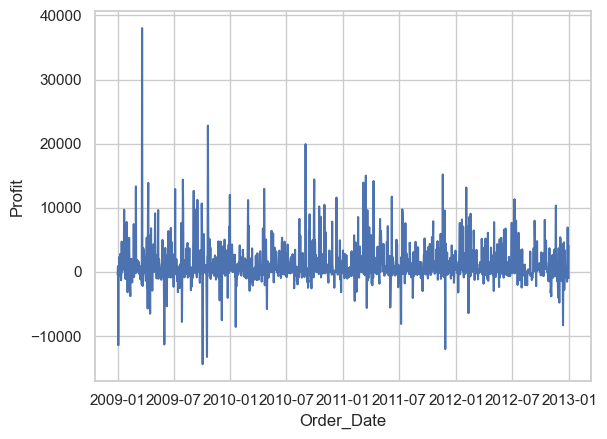

In [28]:
sns.lineplot(df4)

In [29]:
df2['Month'] = df2['Order_Date'].dt.month
df2["year"] = df2['Order_Date'].dt.year

In [30]:
df2

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Order_ID,Order_Date,Order_Priority,Month,year
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",36262,2010-07-27,NOT SPECIFIED,7,2010
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,TECHNOLOGY,TELEPHONES AND COMMUNICATION,36262,2010-07-27,NOT SPECIFIED,7,2010
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,36262,2010-07-27,NOT SPECIFIED,7,2010
3,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",37863,2011-02-24,HIGH,2,2011
4,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",53026,2012-02-26,LOW,2,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Ord_5018,Prod_14,SHP_7001,Cust_1696,7325.63,0.04,38,1899.23,24.49,0.46,TECHNOLOGY,COPIERS AND FAX,54214,2012-02-01,MEDIUM,2,2012
8395,Ord_669,Prod_14,SHP_916,Cust_224,20872.16,0.03,29,-4437.91,24.49,0.41,TECHNOLOGY,COPIERS AND FAX,52035,2009-11-27,HIGH,11,2009
8396,Ord_508,Prod_14,SHP_686,Cust_186,19109.61,0.10,40,-379.29,24.49,0.36,TECHNOLOGY,COPIERS AND FAX,5988,2010-11-21,NOT SPECIFIED,11,2010
8397,Ord_3721,Prod_14,SHP_5162,Cust_1309,614.14,0.09,3,-735.27,24.49,0.46,TECHNOLOGY,COPIERS AND FAX,27616,2012-07-30,LOW,7,2012


In [33]:
df_grp = df2.groupby(['year','Month']).Sales.sum()
df_grp

year  Month
2009  1        379695.0180
      2        336525.2050
      3        411076.4110
      4        439218.8355
      5        382541.0940
      6        286397.2530
      7        339817.0355
      8        301470.8270
      9        307395.8935
      10       346021.8880
      11       265888.1155
      12       413091.8795
2010  1        240197.9760
      2        243504.4415
      3        273429.5910
      4        242681.2995
      5        272234.3790
      6        279740.5190
      7        283801.7100
      8        212134.3055
      9        463269.2195
      10       350759.6650
      11       323332.1120
      12       364595.5865
2011  1        191642.3765
      2        286007.3815
      3        311709.1650
      4        325909.2735
      5        315211.8710
      6        253306.7455
      7        268256.9980
      8        247245.7245
      9        221745.5960
      10       362875.2945
      11       365289.9605
      12       287616.3155
2012  1        3

In [39]:
df_grp = df2.groupby(['year']).Sales.mean()
df_grp

year
2009    1955.011359
2010    1657.180581
2011    1716.691659
2012    1769.725910
Name: Sales, dtype: float64

<AxesSubplot: xlabel='year', ylabel='Sales'>

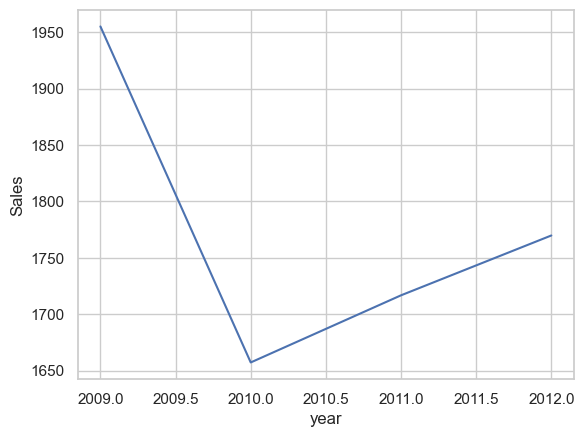

In [40]:
sns.lineplot(data=df_grp)

In [47]:
help( pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'str' = 'All', observed: 'bool' = False, sort: 'bool' = True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Groupe

In [50]:
#Pivot table

year_m = pd.pivot_table(df2, values='Sales', index='year', columns='Month', aggfunc=np.mean)
year_m

Month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2009,1898.475090,2116.510723,2258.661599,2374.155868,1922.317055,1548.093259,1909.084469,1827.095921,1717.295494,2203.961070,1502.192743,2209.047484
2010,1549.664361,1591.532297,1708.934944,1461.935539,1440.393540,1695.397085,1272.653408,1277.917503,2216.599136,1927.250907,1806.324648,1869.720956
2011,1321.671562,1733.378070,1822.860614,2062.716921,1822.033936,1655.599644,1515.576260,1471.700741,1430.616748,1851.404564,2161.479056,1672.187881
2012,2220.831551,2438.166961,1578.284028,1325.253694,1865.744629,2192.228263,1824.935942,1090.950643,1628.963780,1636.951775,1935.183039,1747.047528


In [51]:
year_m.reset_index()

Month,year,1,2,3,4,5,6,7,8,9,10,11,12
0,2009,1898.475090,2116.510723,2258.661599,2374.155868,1922.317055,1548.093259,1909.084469,1827.095921,1717.295494,2203.961070,1502.192743,2209.047484
1,2010,1549.664361,1591.532297,1708.934944,1461.935539,1440.393540,1695.397085,1272.653408,1277.917503,2216.599136,1927.250907,1806.324648,1869.720956
2,2011,1321.671562,1733.378070,1822.860614,2062.716921,1822.033936,1655.599644,1515.576260,1471.700741,1430.616748,1851.404564,2161.479056,1672.187881
3,2012,2220.831551,2438.166961,1578.284028,1325.253694,1865.744629,2192.228263,1824.935942,1090.950643,1628.963780,1636.951775,1935.183039,1747.047528
